<a href="https://colab.research.google.com/github/ehye1/data-python/blob/main/chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**09-1 '한국복지패널 데이터' 분석 준비하기**

In [ ]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
raw_welfare = pd.read_spss('/content/drive/MyDrive/data/Koweps_hpwc14_2019_beta2.sav')

In [ ]:
welfare = raw_welfare.copy()
welfare

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [ ]:
#변수명 바꾸기
welfare = welfare.rename(
    columns = {'h14_g3'     : 'sex',
               'h14_g4'     : 'birth',
               'h14_g10'    : 'marriage_type',
               'h14_g11'    : 'religion',
               'p1402_8aq1' : 'income',
               'h14_eco9'   : 'code_job',
               'h14_reg7'   : 'code_region'}
)

**09-2 성별에 따른 월급 차이**

In [ ]:
#변수 타입 출력
welfare['sex'].dtypes

dtype('float64')

In [ ]:
#빈도 구하기
#이상치 확인
welfare['sex'].value_counts()

2.0    7913
1.0    6505
Name: sex, dtype: int64

In [ ]:
#성별 항목 이름 부여
welfare['sex'] = np.where(welfare['sex'] == 1.0, 'male', 'female')
welfare['sex'].value_counts()

female    7913
male      6505
Name: sex, dtype: int64

In [ ]:
#월급 이상치 확인
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [ ]:
#결측치 확인
welfare['income'].isna().sum()

9884

In [ ]:
#성별 월급 평균표 만들기
sex_income = welfare.dropna(subset = ['income']) \
                    .groupby('sex', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

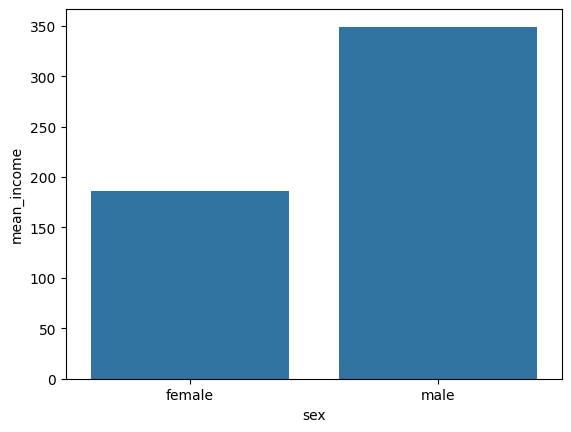

In [ ]:
#막대 그래프 만들기
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

**09-3 나이와 월급의 관계**

In [ ]:
#변수 검토하기
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

In [ ]:
#파생 변수 만들기 (나이)
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

In [ ]:
#나이별 월급 평균표 만들기
age_income = welfare.dropna(subset = ['income']) \
                    .groupby('age', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
age_income.head()

,age,mean_income
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

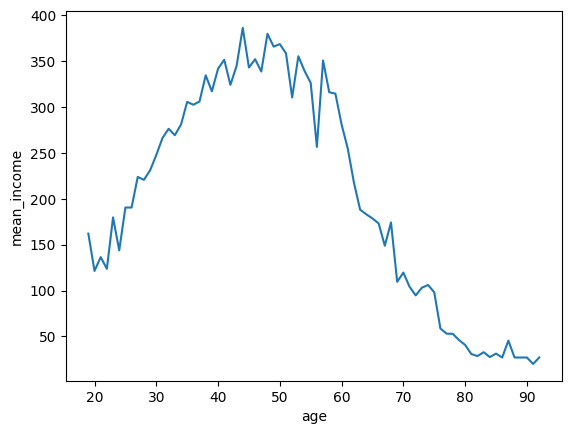

In [ ]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

**09-4 연령대에 따른 월급 차이**

In [ ]:
#파생변수 만들기 (연령대)
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [ ]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle',
                                                               'old')))
welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

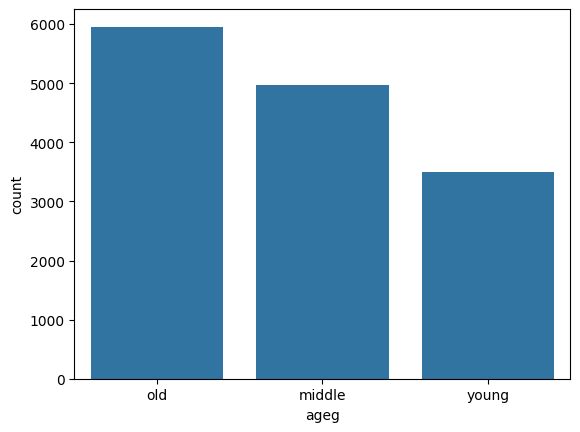

In [ ]:
#빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'ageg')

<Axes: xlabel='ageg', ylabel='mean_income'>

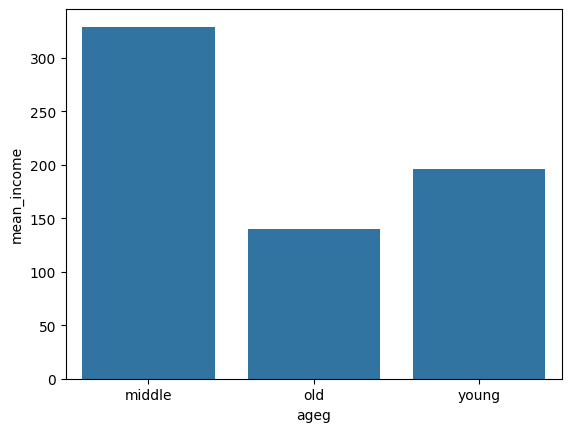

In [ ]:
#연령대별 월급 평균표 만들기
ageg_income = welfare.dropna(subset = ['income']) \
                     .groupby('ageg', as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

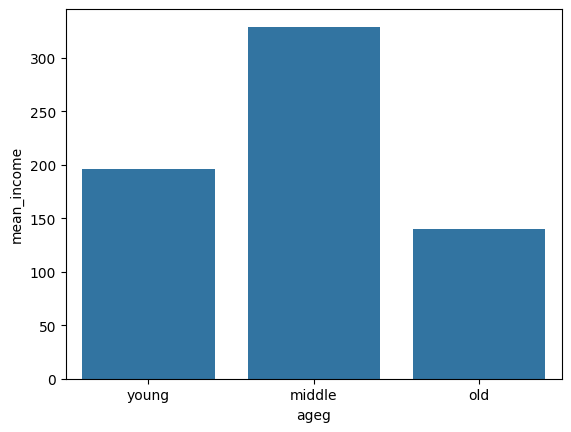

In [ ]:
#막대 정렬하기
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])

**09-5 연령대 및 성별 월급 차이**

<Axes: xlabel='ageg', ylabel='mean_income'>

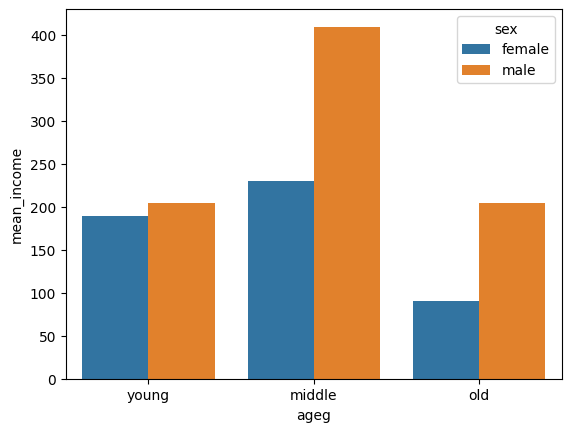

In [ ]:
sex_income = welfare.dropna(subset = ['income']) \
                     .groupby(['ageg', 'sex'], as_index = False) \
                     .agg(mean_income = ('income', 'mean'))
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

**09-6 직업별 월급 차이**

In [ ]:
#코드북의 직업분류코드 목록을 이용해 직업 이름을 나타낸 변수 만들기
list_job = pd.read_excel('/content/drive/MyDrive/data/Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [ ]:
#list_job을 welfare에 결합 (code_job 변수를 기준으로)
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')
welfare.dropna(subset = ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [ ]:
#직업별 월급 평균표 만들기
job_income = welfare.dropna(subset = ['job', 'income']) \
                    .groupby('job', as_index = False) \
                    .agg(mean_income = ('income', 'mean'))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [ ]:
#월급 상위 10개 추출
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [ ]:
#그래프 만들기 전 폰트 설정
import sys
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths = ['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)
  import matplotlib.pyplot as plt
  plt.rc('font', family = 'NanumBarunGothic')
  import matplotlib
  matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


<Axes: xlabel='mean_income', ylabel='job'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


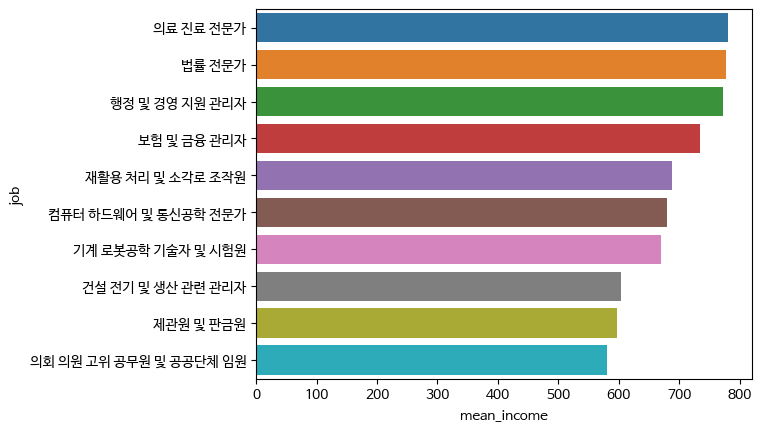

In [ ]:
#막대 그래프 만들기
sns.barplot(data = top10, x = 'mean_income', y = 'job', hue = 'job')

**09-7 성별 직업 빈도**

In [ ]:
#남성 직업 빈도 상위 10개 추출
job_male = welfare.dropna(subset = ['job']) \
                  .query('sex == "male"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [ ]:
#여성 직업 빈도 상위 10개 추출
job_female = welfare.dropna(subset = ['job']) \
                  .query('sex == "female"') \
                  .groupby('job', as_index = False) \
                  .agg(n = ('job', 'count')) \
                  .sort_values('n', ascending = False) \
                  .head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


In [ ]:
sex_income = welfare.dropna(subset = ['job']) \
                    .groupby(['sex', 'job']) \
                    .agg(n = ('job', 'count')) \
                    .sort_values('n', ascending = False) \
                    .head(10)
sex_income

n
sex    job                 
male   작물 재배 종사자        486
female 작물 재배 종사자        476
       청소원 및 환경미화원      282
male   자동차 운전원          230
       경영 관련 사무원        216
female 매장 판매 종사자        212
       회계 및 경리 사무원      163
       돌봄 및 보건 서비스 종사자  155
       제조 관련 단순 종사자     148
male   매장 판매 종사자        142

Text(0, 0.5, '직업별 빈도')

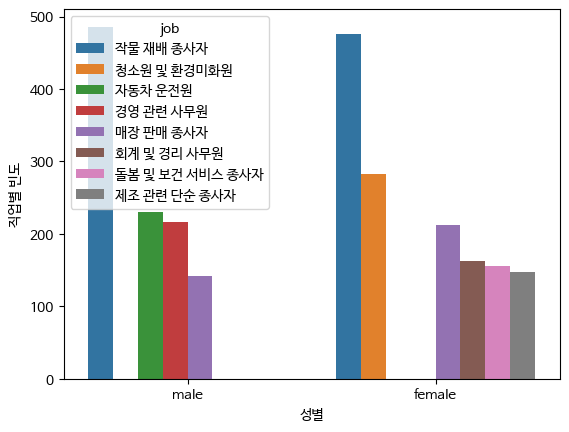

In [ ]:
sns.barplot(data = sex_income, x = 'sex', y = 'n', hue = 'job')
plt.xlabel('성별')
plt.ylabel('직업별 빈도')

**09-8 종교 유무에 따른 이혼율**

In [ ]:
welfare['religion'].value_counts()

2.0    7815
1.0    6603
Name: religion, dtype: int64

In [ ]:
#종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')
welfare['religion'].value_counts()

no     7815
yes    6603
Name: religion, dtype: int64

In [ ]:
welfare['marriage_type'].value_counts()

1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: marriage_type, dtype: int64

In [ ]:
#파생변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce',
                                                              'etc'))

In [ ]:
#이혼 여부별 빈도
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


In [ ]:
rel_div = welfare.query('marriage != "etc"') \
                  .groupby('religion', as_index = False) \
                  ['marriage'] \
                  .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [ ]:
#이혼율 추출
#백분율로 바꾸고 반올림 하기
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \
                 .round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

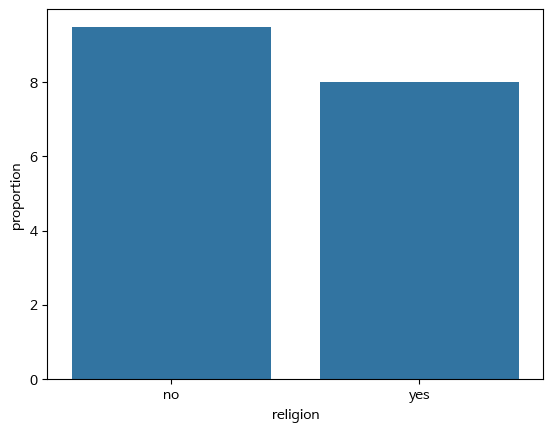

In [ ]:
sns.barplot(data = rel_div, x = 'religion', y = 'proportion')